In [3]:
import os
import imageio

png_dir = '2D_images/'
images = []
for i in range(51):
    file_path = os.path.join(png_dir, '2D_'+str(i)+'.png')
    images.append(imageio.imread(file_path))
imageio.mimsave('2D_movie.gif', images)

In [12]:
import os
import imageio

png_dir = '1D_images/'
images = []
for i in range(1,21):
    file_path = os.path.join(png_dir, '1D_'+str(i)+'.png')
    images.append(imageio.imread(file_path))
imageio.mimsave('1D_PES_movie.gif', images, duration=0.8)

In [2]:
import os
import imageio

png_dir = '/'
images = []
for i in range(51):
    file_path = '2D_'+str(i)+'.png'
    images.append(imageio.imread(file_path))
imageio.mimsave('2D_movie_MES.gif', images)

In [3]:
import numpy as np
np.warnings.filterwarnings('ignore')
import datetime
import os
import math
import torch
import gpytorch

import excursion

import excursion.testcases.fast_1D as testcase_details
import excursion.optimize
import excursion.active_learning as active_learning

from excursion.utils import get_first_max_index,point_entropy, mesh2points, points2mesh, values2mesh

import excursion.plotting.onedim as plots
#import excursion.utils as utils

import matplotlib.pyplot as plt
%matplotlib inline

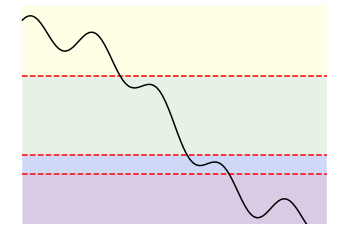

In [44]:
#init true functions + thresholds
for func in testcase_details.true_functions:
    X_plot = testcase_details.plot_X
    plt.plot(X_plot, func(X_plot), color='black')
    
thresholds = [5.,7.,15.]    
    
for i in range(len(thresholds)):
    plt.hlines(thresholds[i],-1.,1., colors = 'red', linestyle='--')

plt.fill_between(np.linspace(-1,1,1000),-10, 5., facecolor='rebeccapurple', interpolate=True, alpha=0.25)    
plt.fill_between(np.linspace(-1,1,1000),5., 7., facecolor='royalblue', interpolate=True, alpha=0.25)    
plt.fill_between(np.linspace(-1,1,1000),7, 15., facecolor='green', interpolate=True, alpha=0.1)    
plt.fill_between(np.linspace(-1,1,1000),15., 30., facecolor='yellow', interpolate=True, alpha=0.1)    

plt.ylim([0,22])
plt.ylabel('f(x)')
plt.xlabel('x')
plt.axis('off')
plt.savefig('example.svg')